In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
air=pd.read_csv("E:/SHRADDHA/DA-DS Assignments/DS Assignments/7.A_Clustering/Airlines.csv")
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Hierarchical Clustering

In [3]:
air_c=air.drop(['ID#'],axis=1)
air_c.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df=norm_func(air.iloc[:,1:])

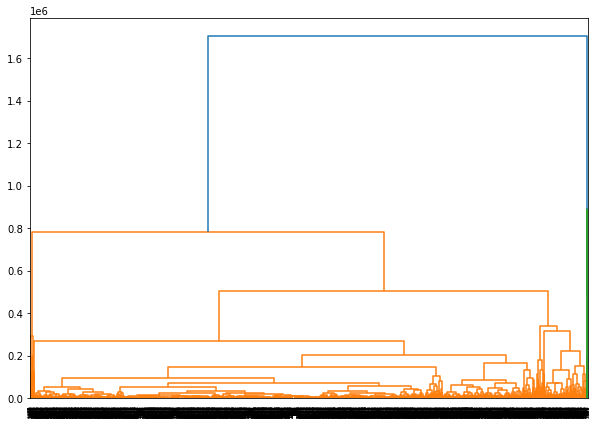

In [6]:
plt.figure(figsize=(10, 7))
dendrogram=sch.dendrogram(sch.linkage(air_c,method='complete'))

In [7]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')

In [8]:
y_hc=hc.fit_predict(air_c)
Clusters=pd.DataFrame(y_hc,columns=["Clusters"])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


# kMeans

In [36]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [32]:
air=pd.read_csv("E:/SHRADDHA/DA-DS Assignments/DS Assignments/7.A_Clustering/Airlines.csv")
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [33]:
def norm_func(i):
   x=(i-i.min())/(i.max()-i.min())
   return (x)

In [34]:
df_norm=norm_func(air.iloc[:,1:10])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472
...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868


In [49]:
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [50]:
md=pd.Series(model.labels_)
air['clust']=md
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472


In [51]:
air_c.iloc[:,1:].groupby(air.clust).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
clust,,,,,,,,
0,146.397242,1.000000,1.000000,1.004448,3759.316281,6.447954,447.272687,1.350979
1,168.975400,4.354244,1.001230,1.035670,54147.504305,20.627306,637.984010,1.926199
2,121.468750,2.681920,1.000000,1.011161,17315.978795,16.061384,324.285714,0.887277
3,23.809524,1.071429,2.357143,1.000000,13672.833333,17.619048,596.500000,2.261905


In [52]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


# DBSCAN

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
air=pd.read_csv("E:/SHRADDHA/DA-DS Assignments/DS Assignments/A_Clustering/Airlines.csv")
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
air.drop(['ID#','Days_since_enroll','Award?'],axis=1,inplace=True)
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
0,28143,0,1,1,1,174,1,0,0
1,19244,0,1,1,1,215,2,0,0
2,41354,0,1,1,1,4123,4,0,0
3,14776,0,1,1,1,500,1,0,0
4,97752,0,4,1,1,43300,26,2077,4


In [6]:
array=air.values
array

array([[28143,     0,     1, ...,     1,     0,     0],
       [19244,     0,     1, ...,     2,     0,     0],
       [41354,     0,     1, ...,     4,     0,     0],
       ...,
       [73597,     0,     3, ...,     8,     0,     0],
       [54899,     0,     1, ...,     1,   500,     1],
       [ 3016,     0,     1, ...,     0,     0,     0]], dtype=int64)

In [7]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.10406452e+00, -3.28603258e-01, -3.62167870e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.99926165e-01, -3.28603258e-01, -3.62167870e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.91649446e-01, -3.28603258e-01, -3.62167870e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.75096007e-01, -3.28603258e-01, -3.62167870e-01],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.10406452e+00,  2.85309024e-02, -9.85033311e-02],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.20820288e+00, -3.28603258e-01, -3.62167870e-01]])

In [8]:
dbscan=DBSCAN(eps=0.4,min_samples=10)
dbscan.fit(X)

DBSCAN(eps=0.4, min_samples=10)

In [9]:
dbscan.labels_

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [10]:
cl=pd.DataFrame(dbscan.labels_,columns=["clusters"])
cl                

,clusters
0,0
1,0
2,0
3,0
4,-1
...,...
3994,0
3995,0
3996,4
3997,0


In [11]:
pd.concat([air,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,clusters
0,28143,0,1,1,1,174,1,0,0,0
1,19244,0,1,1,1,215,2,0,0,0
2,41354,0,1,1,1,4123,4,0,0,0
3,14776,0,1,1,1,500,1,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,-1
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,0
3995,64385,0,1,1,1,981,5,0,0,0
3996,73597,0,3,1,1,25447,8,0,0,4
3997,54899,0,1,1,1,500,1,500,1,0
